<a href="https://colab.research.google.com/github/clarakistner/dados_python/blob/main/Aulas_de_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [5]:
df.head(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [8]:
df.shape

(133349, 11)

In [9]:
linhas, colunas = df.shape[0], df.shape[1]
print("Linhas:", linhas, "\nColunas:", colunas)

Linhas: 133349 
Colunas: 11


In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
column_renomear = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'funcionario',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
df.rename(columns=column_renomear, inplace=True)
print("Colunas do DataFrame traduzidas:")
print(df.columns)

Colunas do DataFrame traduzidas:
Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'funcionario', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [12]:
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'funcionario', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [13]:
column_renomear = {
    'ano': 'ano',
    'nivel_experiencia': 'senioridade',
    'tipo_emprego': 'contrato',
    'cargo': 'cargo',
    'salario': 'salario',
    'moeda_salario': 'moeda',
    'salario_em_usd': 'usd',
    'residencia_funcionario': 'funcionario',
    'taxa_remoto': 'remoto',
    'localizacao_empresa': 'empresa',
    'tamanho_empresa': 'tamanho_empresa'
}
df.rename(columns=column_renomear, inplace=True)
print("Colunas do DataFrame traduzidas:")
print(df.columns)

Colunas do DataFrame traduzidas:
Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'funcionario', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [14]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [15]:
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
})
print("Categorias da coluna 'senioridade' traduzidas:")
print(df['senioridade'].value_counts())

Categorias da coluna 'senioridade' traduzidas:
senioridade
Sênior       77241
Pleno        40465
Júnior       12443
Executivo     3200
Name: count, dtype: int64


In [16]:
df["senioridade"].value_counts()

,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [17]:
contrato = {
    'PT': 'Tempo Parcial',
    'FT': 'Tempo Integral',
    'FL': 'Freelance',
    'CT': 'Contrato'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()


,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelance,16


In [18]:
empresa_tamanho = {
    'S': 'Grande',
    'M': 'Médio',
    'L': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(empresa_tamanho)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Médio,129561
Pequeno,3574
Grande,214


In [19]:
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()


,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [20]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,funcionario,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [21]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,funcionario,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [22]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,funcionario,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
funcionario,0
remoto,0
empresa,0


In [24]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,funcionario,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Pequeno
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Pequeno
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Pequeno


In [26]:
import numpy as np

df_salarios = pd.DataFrame ({
    'nome': ['Clara', 'Jaime', 'Diana', 'Artur', 'Robson'],
    'salario': [5000, np.nan, 9000, np.nan, 20000]  })

#calcula a média dos salários e susbstitui os nulos
df_salarios['media_salarios'] = df_salarios['salario'].fillna(df_salarios['salario'].mean(). round(2))

#faz a mediana
df_salarios['mediana_salarios'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,media_salarios,mediana_salarios
0,Clara,5000.0,5000.00,5000.0
1,Jaime,NaN,11333.33,9000.0
2,Diana,9000.0,9000.00,9000.0
3,Artur,NaN,11333.33,9000.0
4,Robson,20000.0,20000.00,20000.0


In [27]:
df_temperaturas = pd.DataFrame ({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, 31, np.nan, 32]
})

df_temperaturas['temperatura_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

,Dia,Temperatura,temperatura_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,31.0,31.0
3,Quinta,NaN,31.0
4,Sexta,32.0,32.0


In [28]:
df_cidades = pd.DataFrame ({
    'Nome': ['Clara', 'Sofia', 'João', 'Rodrigo'],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', np.nan]
})

df_cidades['cidade_preenchida'] = df_cidades['Cidade'].fillna("Não informada")
df_cidades

,Nome,Cidade,cidade_preenchida
0,Clara,São Paulo,São Paulo
1,Sofia,Rio de Janeiro,Rio de Janeiro
2,João,Belo Horizonte,Belo Horizonte
3,Rodrigo,NaN,Não informada


In [29]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
funcionario,0
remoto,0
empresa,0


In [30]:
df_limpo = df.dropna()

df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
funcionario,0
remoto,0
empresa,0


In [31]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   funcionario      133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [32]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   funcionario      133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [33]:
df_estudantes = pd.DataFrame ({
    'Nome': ['Clara', 'Sofia', 'João', 'Rodrigo', 'Érica'],
    'Idade': [17, 18, 26, 21, 14],
    'Nota': [10, np.nan, 8, 6, np.nan],
    'Cidade': ['Curitiba', 'Rio de Janeiro', 'Belo Horizonte', 'São Paulo', 'Gaspar']
})

# Criar uma coluna para indicar se a nota estava ausente antes de preencher
df_estudantes['nota_originalmente_ausente'] = df_estudantes['Nota'].isnull()

# Preencher as notas ausentes com a média das notas existentes
mean_nota = df_estudantes['Nota'].mean().round(2)
df_estudantes['Nota'] = df_estudantes['Nota'].fillna(mean_nota)

# Converter a coluna 'Idade' para tipo inteiro
df_estudantes['Idade'] = df_estudantes['Idade'].astype(int)

df_estudantes

,Nome,Idade,Nota,Cidade,nota_originalmente_ausente
0,Clara,17,10.0,Curitiba,False
1,Sofia,18,8.0,Rio de Janeiro,True
2,João,26,8.0,Belo Horizonte,False
3,Rodrigo,21,6.0,São Paulo,False
4,Érica,14,8.0,Gaspar,True


In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,funcionario,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [35]:
df_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,funcionario,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Sênior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Pequeno
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Pequeno
133346,2020,Júnior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Grande
133347,2020,Júnior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Pequeno


<Axes: title={'center': 'distribuição de senioridade'}, xlabel='senioridade'>

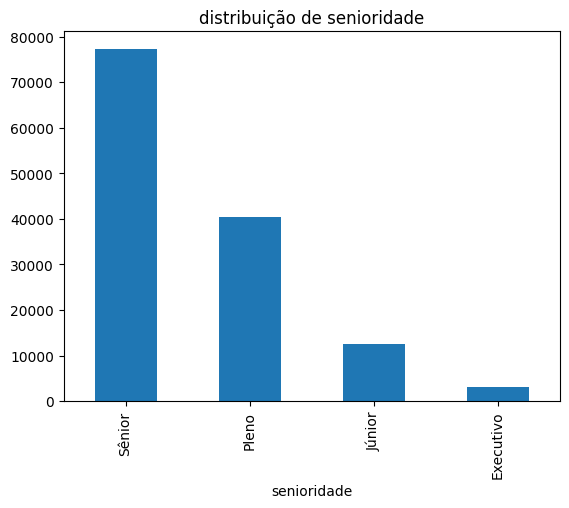

In [36]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="distribuição de senioridade")

In [37]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

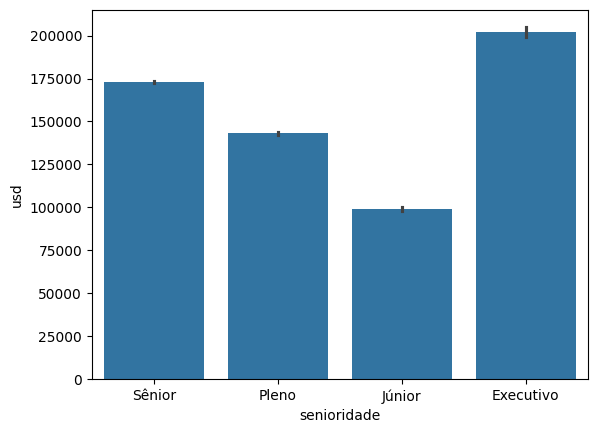

In [38]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

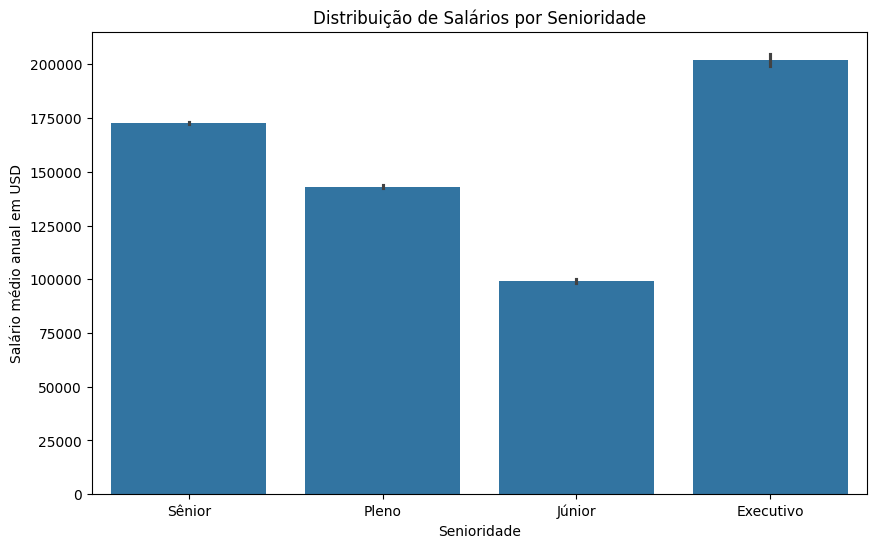

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual em USD')
plt.title('Distribuição de Salários por Senioridade')
plt

In [41]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [42]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='object', name='senioridade')

Text(0.5, 1.0, 'Distribuição de Salários por Senioridade')

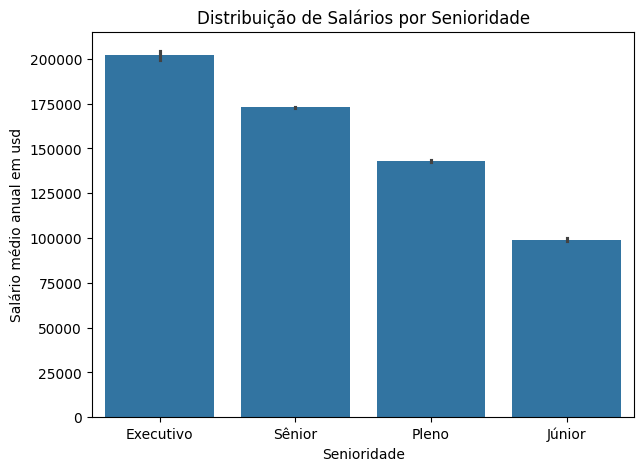

In [43]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual em usd')
plt.title('Distribuição de Salários por Senioridade')

Text(0.5, 1.0, 'Distribuição de Salários Anuais')

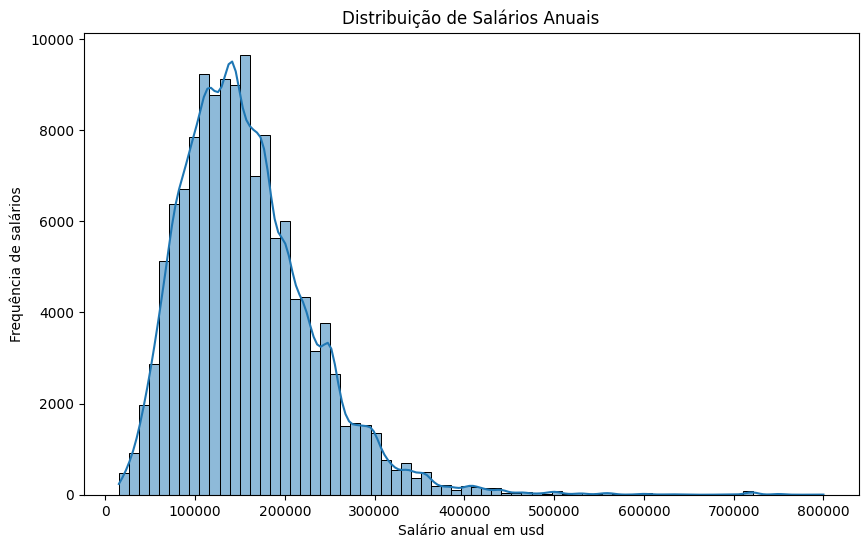

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df_limpo['usd'], bins=70, kde=True)
plt.xlabel('Salário anual em usd')
plt.ylabel('Frequência de salários')
plt.title('Distribuição de Salários Anuais')

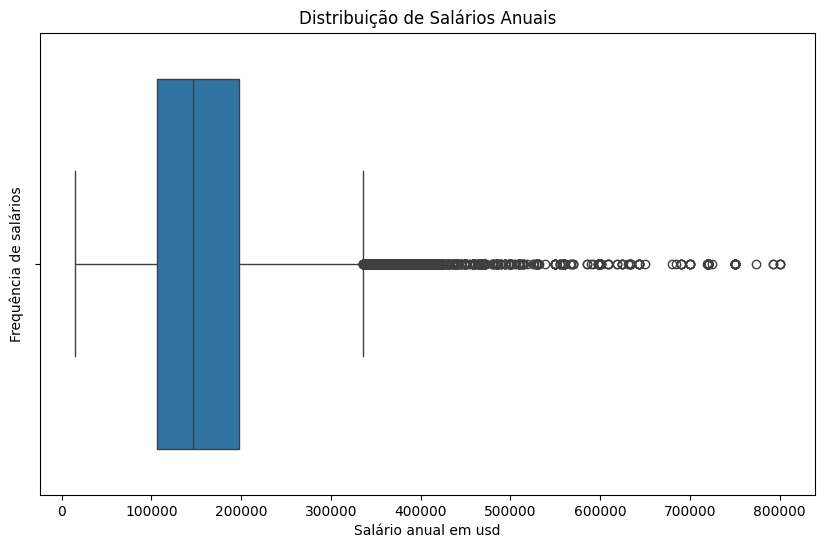

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpo['usd'])
plt.xlabel('Salário anual em usd')
plt.ylabel('Frequência de salários')
plt.title('Distribuição de Salários Anuais')
plt.show()

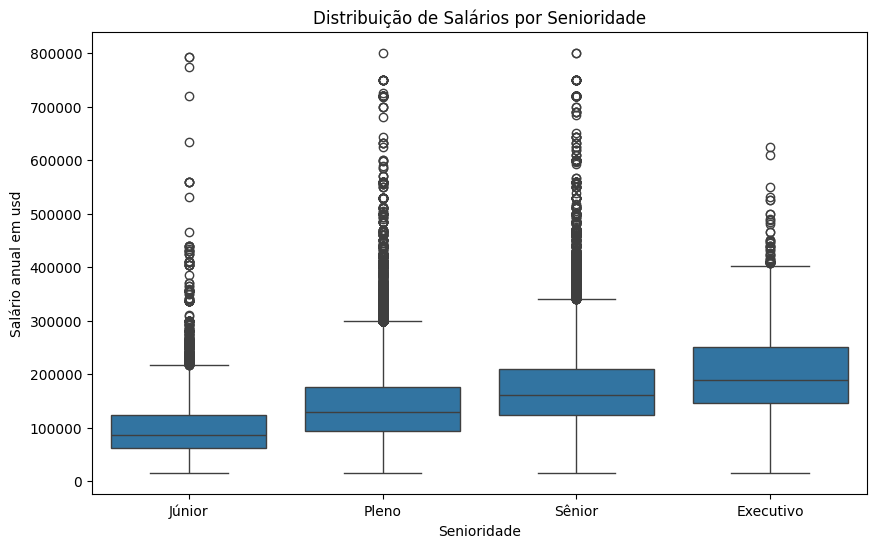

In [49]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpo['senioridade'], y=df_limpo['usd'], order=ordem_senioridade)
plt.xlabel('Senioridade')
plt.ylabel('Salário anual em usd')
plt.title('Distribuição de Salários por Senioridade')
plt.show()

Text(0.5, 1.0, 'Distribuição de Salários por Senioridade')

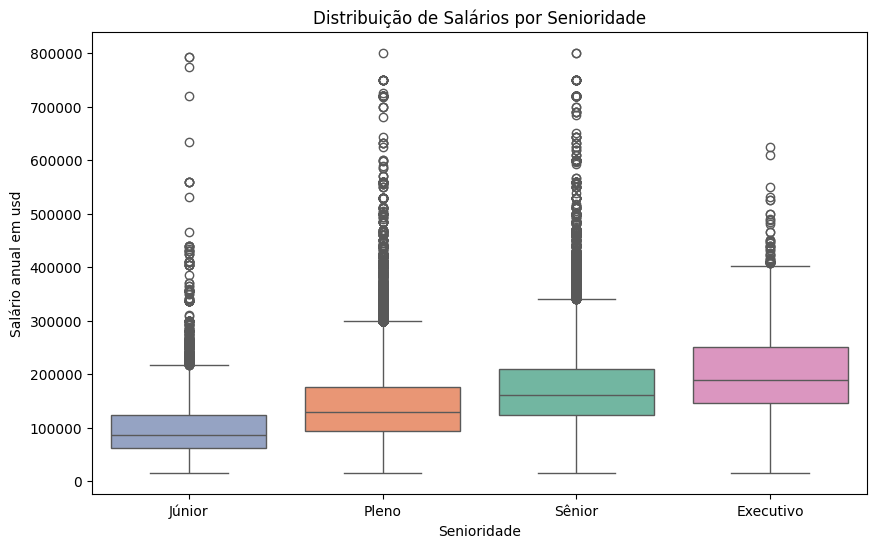

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpo['senioridade'], y=df_limpo['usd'], order=ordem_senioridade, palette='Set2', hue=df_limpo['senioridade'])
plt.xlabel('Senioridade')
plt.ylabel('Salário anual em usd')
plt.title('Distribuição de Salários por Senioridade')

In [52]:
import plotly.express as px

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario, x='senioridade', y='usd', title='média de salários por senioridade',
             labels={'senioridade': 'nível de senioridade', 'usd': 'salário médio anual em USD'})
fig.show()

In [57]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem, values='quantidade', names='tipo_trabalho', title='Distribuição de trabalho remoto', hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig.show()


In [ ]:
cargo = ['data_engeneer']

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpo['s'], y=df_limpo['usd'], order=ordem_senioridade)
plt.xlabel('Senioridade')
plt.ylabel('Salário anual em usd')
plt.title('Distribuição de Salários por Senioridade')
plt.show()

In [58]:
import plotly.express as px

# Calcular a média salarial por cargo
media_salario_por_cargo = df_limpo.groupby('cargo')['usd'].mean().sort_values(ascending=False).reset_index()

# Exibir as 10 maiores médias salariais por cargo
print("Top 10 Cargos com Maiores Salários Médios:")
print(media_salario_por_cargo.head(10))

# Criar o gráfico de barras com Plotly Express
fig = px.bar(media_salario_por_cargo.head(20),
             x='cargo',
             y='usd',
             title='Média Salarial por Cargo (Top 20)',
             labels={'cargo': 'Cargo', 'usd': 'Salário Médio Anual em USD'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

Top 10 Cargos com Maiores Salários Médios:
                                   cargo            usd
0                     Research Team Lead  450000.000000
1          Analytics Engineering Manager  399880.000000
2                 Data Science Tech Lead  375000.000000
3                     Applied AI ML Lead  292500.000000
4                     Head of Applied AI  273875.000000
5               Head of Machine Learning  266429.941176
6  Machine Learning Performance Engineer  262500.000000
7         Director of Product Management  262004.038462
8                    Engineering Manager  260399.127577
9                     AWS Data Architect  258000.000000
